# Correlations

In [92]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [15, 15]
sns.set(style="ticks")

## Explore the correlation between two variables

In [93]:
english=[56,75,45,71,62,64,58,80,76,61]
math=[66, 70, 40,60,65,56,59,77,67,63]

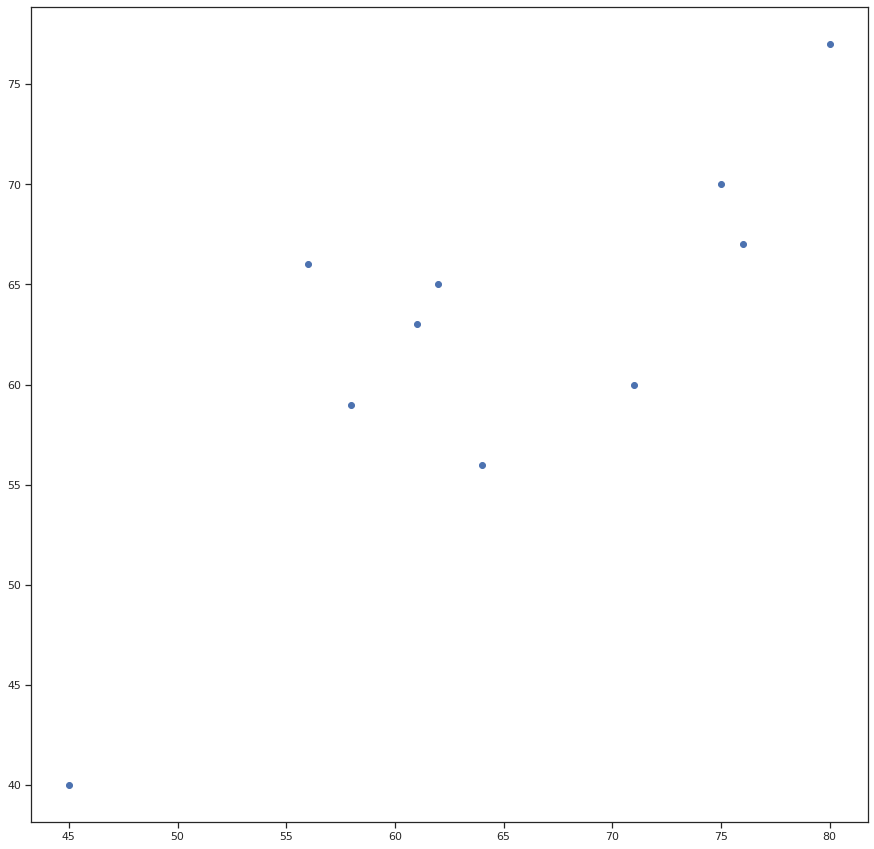

In [94]:
_= plt.scatter(english, math)

In [84]:
r, pval = stats.pearsonr(english, math)
print('Pearson coef: {:.2f}'.format(r))

Pearson coef: 0.81


In [87]:
r, pval = stats.spearmanr(english, math)
print('Spearman coef: {:.2f}'.format(r))

Spearman coef: 0.67


In [88]:
tau, pval = stats.kendalltau(english, math)
print('Kendall tau: {:.2f}'.format(r))

Kendall tau: 0.67


## Explore the correlation between two variables in a Dataframe

In [96]:
# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

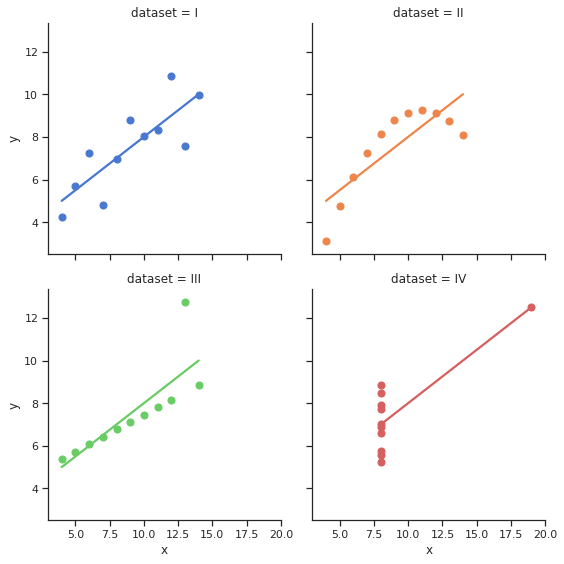

In [97]:
# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

We take one dataset

In [98]:
df.get(df.dataset == 'I')

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


PLot the relation between the two variables

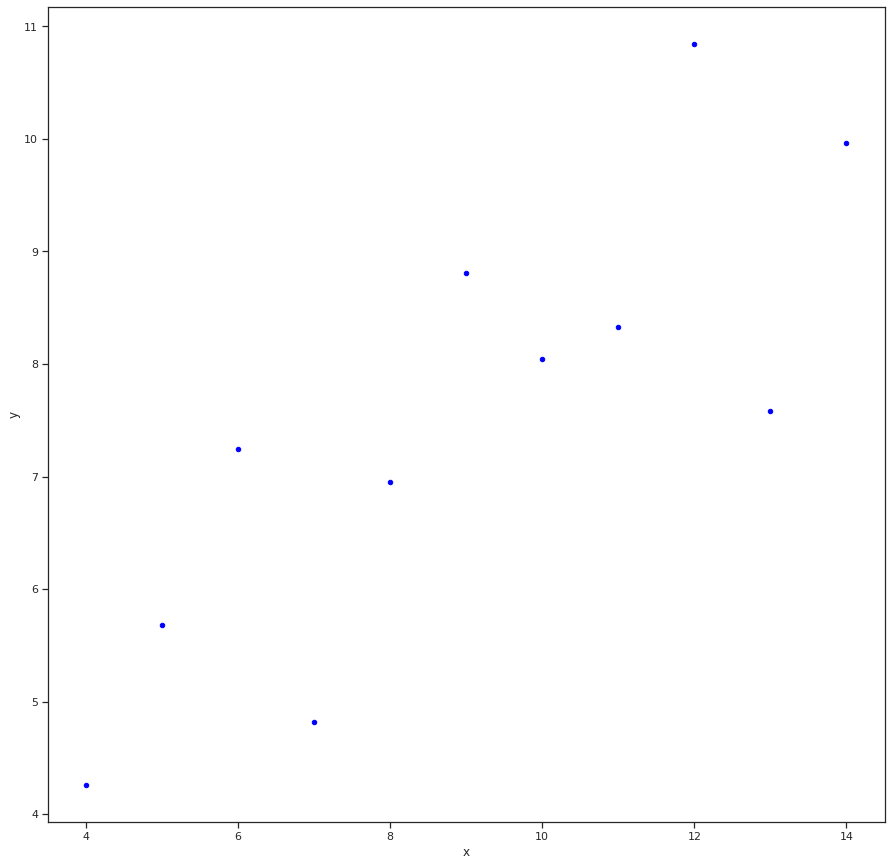

In [99]:
df.get(df.dataset == 'I').plot.scatter('x','y', color='blue')

Calculate the correlation between the two variables (Pearson)

In [100]:
df.get(df.dataset == 'I').corr()

,x,y
x,1.000000,0.816421
y,0.816421,1.000000


Calculate regression line

In [101]:
mx, my = list(df.get(df.dataset == 'I').mean())
sx, sy = list(df.get(df.dataset == 'I').std())

r = df.get(df.dataset == 'I')[['x','y']].corr().iloc[0,1] 

b = r * sy / sx
a = my - b * mx

Calculate the correlation between the two variables (Spearman)

In [106]:
df.get(df.dataset == 'I').x.corr(df.get(df.dataset == 'I').y, method='spearman')

0.8181818181818182

Calculate the correlation between the two variables (Kendall)

In [107]:
df.get(df.dataset == 'I').x.corr(df.get(df.dataset == 'I').y, method='kendall')

0.6363636363636364

## Explore another dataset

In [111]:
animals = pd.read_csv('data/animals_20.csv')

In [110]:
# plot histogram

In [ ]:
# plot scatterplot

In [ ]:
# calculate correlation

## Explore another dataset

In [121]:
water = pd.read_csv("data/water_price.csv")

In [122]:
water.head()

,distance,price
0,50,1.8
1,175,1.2
2,270,2.0
3,375,1.0
4,425,1.0


In [110]:
# plot histogram

In [ ]:
# plot scatterplot

In [ ]:
# calculate correlation

## Visualize correlation

In [123]:
vehicles = pd.read_csv('data/vehicles.csv')

In [124]:
vehicles.get(vehicles.columns[-6:]).head()

,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,19.388824,18,17,17,522.764706,1950
1,25.354615,13,13,13,683.615385,2550
2,20.600625,16,17,16,555.437500,2100
3,25.354615,13,13,13,683.615385,2550
4,20.600625,14,21,16,555.437500,2550


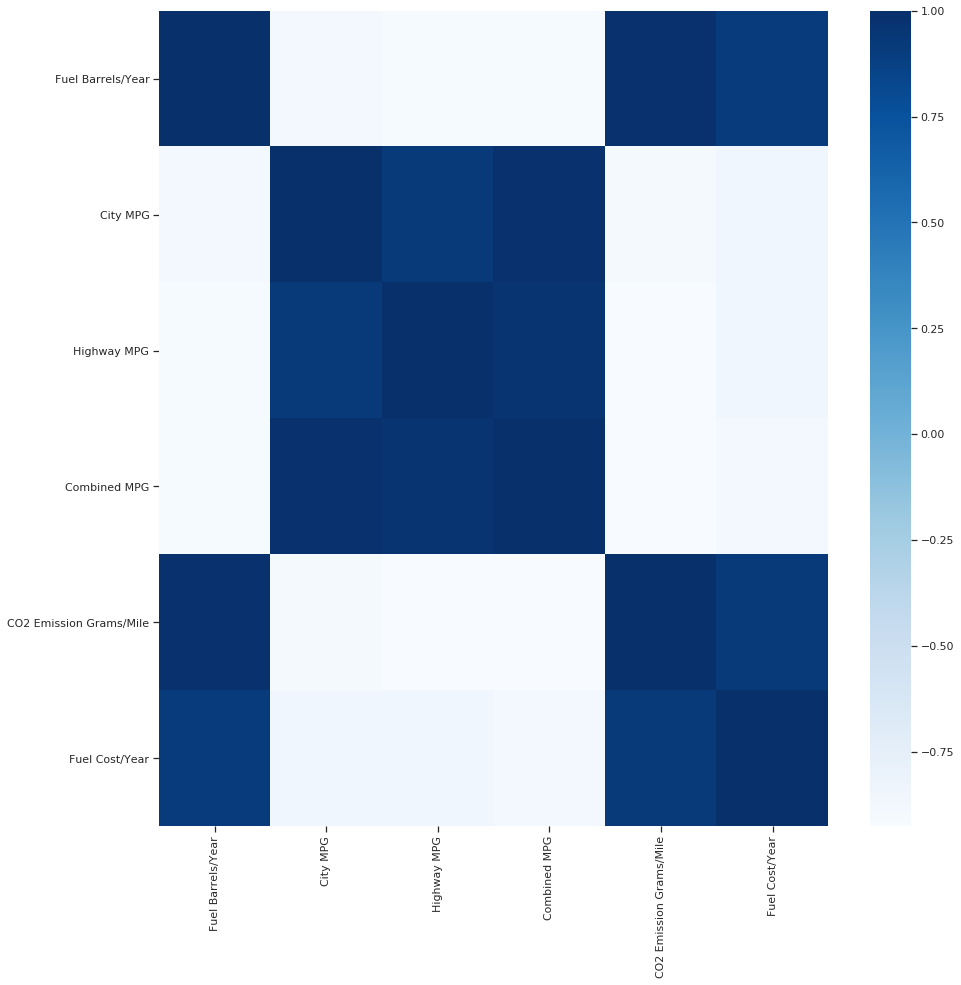

In [125]:
sns.heatmap(vehicles.get(vehicles.columns[-6:]).corr(), cmap='Blues')